<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
import matplotlib.pyplot as plt

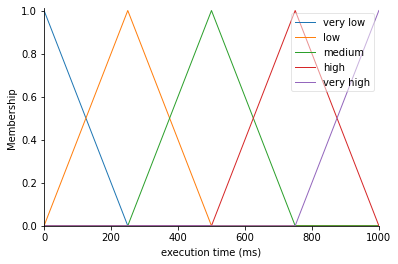

In [4]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)')
names = ['very low','low','medium','high','very high']
ei.automf(names = names)
ei.view()

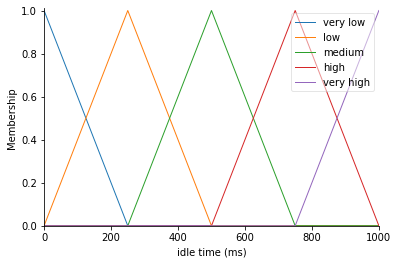

In [5]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
names = ['very low','low','medium','high','very high']
Ii.automf(names = names)
Ii.view()

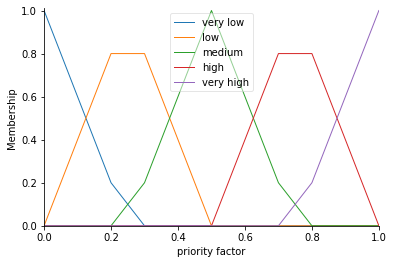

In [6]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
names = ['very low','low','medium','high','very high']
pi.automf(names = names)
pi.view()

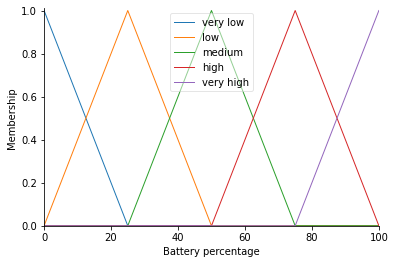

In [7]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
names = ['very low','low','medium','high','very high']
bi.automf(names = names)
bi.view()

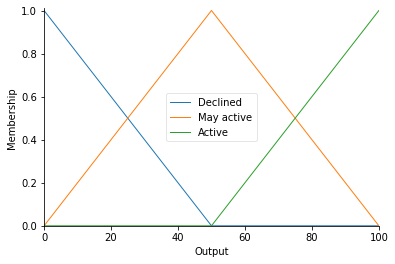

In [8]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
names = ['Declined','May active','Active']
si.automf(names = names)
si.view()

In [9]:
rule1 = ctrl.Rule(ei['very low'] & Ii['very high'] & pi['very high'] & bi['very high'],si['Active'])
rule2 = ctrl.Rule(ei['very high'] & Ii['very low'] & pi['very low'] & bi['very low'],si['Declined'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e78407410>)

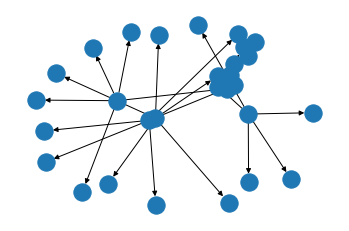

In [10]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e762d5950>)

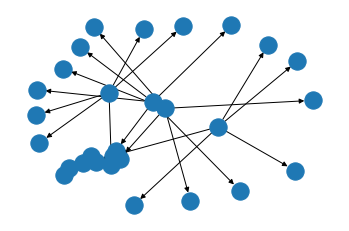

In [11]:
rule2.view()

In [12]:
op = ctrl.ControlSystem([rule1,rule2])
Sensor = ctrl.ControlSystemSimulation(op)

In [13]:
def SensorOutput():
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  si.view(sim=Sensor)

execution time: 100
idle time: 900
priority factor: 0.9
battery percentage: 95
chance of activation of sensor: 81.4286%


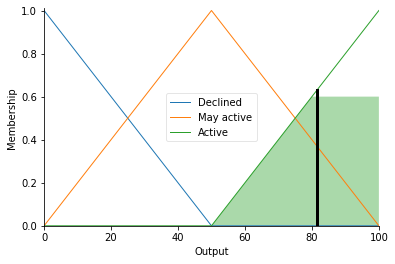

In [14]:
SensorOutput()